# Data Exploration

## Setup

In [1]:
from idstools import _idstools_data, data_explorer, data_preparation

In [2]:
data = _idstools_data.TargetData(input_path="data/BikeRentalDaily_train.csv", input_delimiter=";", label="cnt")

2024-02-04 20:48:43,193 [_idstools_data] [INFO] - Initializing TargetData object.
2024-02-04 20:48:43,195 [_helpers] [INFO] - Reading data from:
/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-04 20:48:43,198 [_idstools_data] [INFO] - Using label: cnt


In [3]:
explorer = data_explorer.DataExplorer(data)

2024-02-04 20:48:43,205 [data_explorer] [INFO] - Initializing DataExplorer
2024-02-04 20:48:43,206 [data_explorer] [INFO] - Output path not provided.
Using default path: /home/davidrmn/Studies/introduction-data-science/results
2024-02-04 20:48:43,206 [data_explorer] [INFO] - Please provide a pipeline configuration.
2024-02-04 20:48:43,207 [data_explorer] [INFO] - Data available: BikeRentalDaily_train


In [4]:
explorer.descriptive_analysis()

In [5]:
explorer.dtypes

instant              int64
dteday              object
season             float64
yr                   int64
mnth                 int64
holiday              int64
weekday              int64
workingday           int64
weathersit           int64
temp               float64
atemp              float64
hum                float64
windspeed          float64
leaflets             int64
price reduction      int64
casual               int64
registered           int64
cnt                  int64
dtype: object

In [6]:
preparator = data_preparation.DataPreparation(data)

2024-02-04 20:48:43,256 [data_preparation] [INFO] - Initializing DataPreparation
2024-02-04 20:48:43,257 [data_preparation] [INFO] - Output path not provided.
Using default path: /home/davidrmn/Studies/introduction-data-science/results
2024-02-04 20:48:43,257 [data_preparation] [INFO] - Please provide a pipeline configuration.
2024-02-04 20:48:43,257 [data_preparation] [INFO] - Data available: BikeRentalDaily_train


In [7]:
preparator.processed_data

In [8]:
from idstools import _config

In [9]:
pipeline = {}
transformer = _config._idstools.DEFAULT.data_preparation.DataPreparation.pipeline.get("_CustomTransformer")

In [10]:
transformer[0].func = "target_to_datetime"
transformer[0].module = "idstools._custom_transformer"
transformer[0].config = {"target": "dteday", "format": "%d.%m.%Y"}

In [11]:
transformer

<BoxList: [{'func': 'target_to_datetime', 'module': 'idstools._custom_transformer', 'config': {'target': 'dteday', 'format': '%d.%m.%Y'}}]>

In [12]:
pipeline["_CustomTransformer"] = transformer

In [13]:
preparator.build_pipeline(pipeline)

2024-02-04 20:48:43,385 [data_preparation] [INFO] - Pipeline created.


In [14]:
preparator.run_pipeline(pipeline)

2024-02-04 20:48:43,391 [data_preparation] [INFO] - Data available: BikeRentalDaily_train
2024-02-04 20:48:43,396 [_custom_transformer] [INFO] - Converting target column 'dteday' to datetime.
2024-02-04 20:48:43,399 [data_preparation] [INFO] - Pipeline step _CustomTransformer has been processed.


In [15]:
explorer.descriptive_analysis()

2024-02-04 20:48:43,406 [data_explorer] [INFO] - Loaded processed data available: BikeRentalDaily_train


In [16]:
explorer.dtypes

instant                     int64
dteday             datetime64[ns]
season                    float64
yr                          int64
mnth                        int64
holiday                     int64
weekday                     int64
workingday                  int64
weathersit                  int64
temp                      float64
atemp                     float64
hum                       float64
windspeed                 float64
leaflets                    int64
price reduction             int64
casual                      int64
registered                  int64
cnt                         int64
dtype: object

In [17]:
explorer.time_series_analysis()

2024-02-04 20:48:43,442 [data_explorer] [INFO] - Loaded processed data available: BikeRentalDaily_train
100%|██████████| 1/1 [00:00<00:00, 434.51it/s]


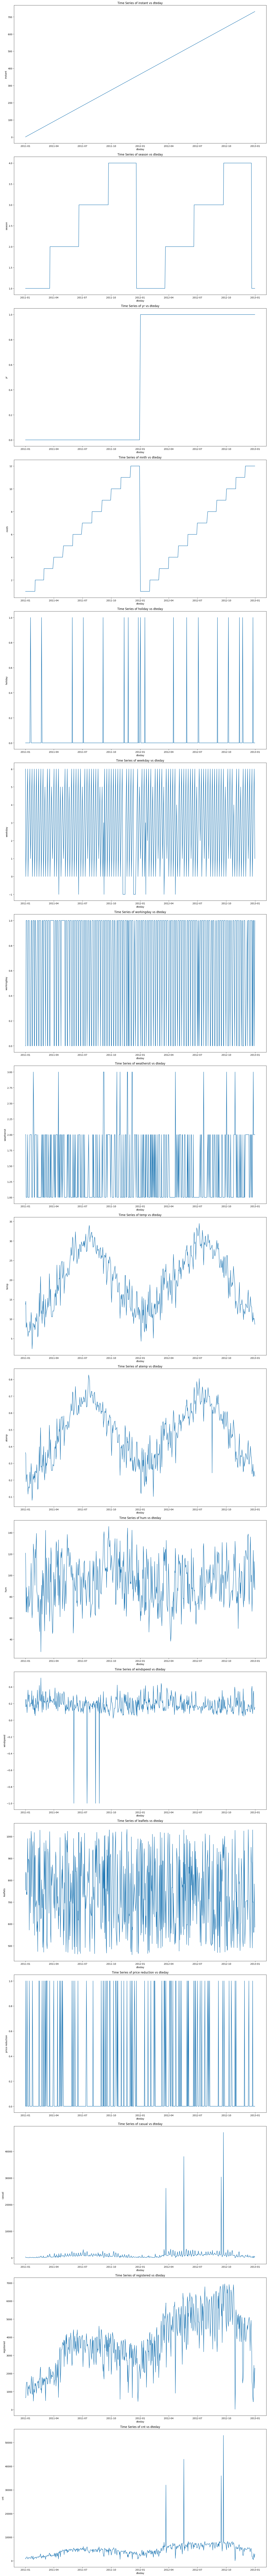

In [18]:
explorer.figures["time_series_plots"]

In [19]:
explorer.correlation_analysis()

2024-02-04 20:48:49,910 [data_explorer] [INFO] - Loaded processed data available: BikeRentalDaily_train


In [20]:
explorer.figures.items()

dict_items([('time_series_plots', <Figure size 1600x15300 with 17 Axes>), ('correlation_heatmap', <Figure size 1600x900 with 2 Axes>)])

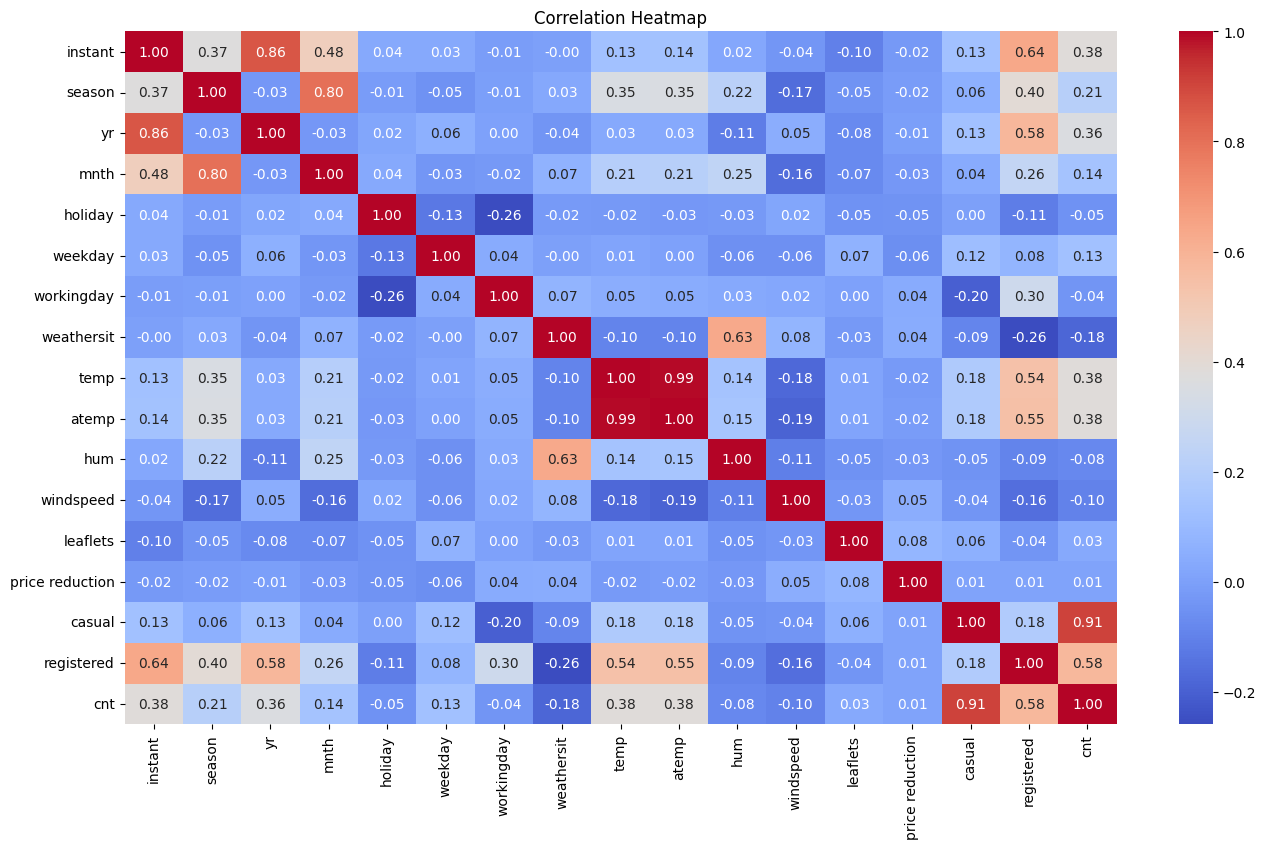

In [21]:
explorer.figures["correlation_heatmap"]

In [22]:
pipeline = {}
transformer = _config._idstools.DEFAULT.data_preparation.DataPreparation.pipeline._OneHotEncoder

In [23]:
transformer[0].target = "mnth"
transformer[0].config.prefix = "month"
transformer[0].config.dtype = "category"

In [24]:
pipeline["_OneHotEncoder"] = transformer

In [25]:
preparator.build_pipeline(pipeline)

2024-02-04 20:48:50,801 [data_preparation] [INFO] - Pipeline created.


In [26]:
preparator.run_pipeline(pipeline)

2024-02-04 20:48:50,840 [data_preparation] [INFO] - Data available: BikeRentalDaily_train
2024-02-04 20:48:50,844 [data_preparation] [INFO] - Pipeline step _OneHotEncoder has been processed.


In [27]:
explorer.descriptive_analysis()

2024-02-04 20:48:50,879 [data_explorer] [INFO] - Loaded processed data available: BikeRentalDaily_train


In [28]:
explorer.dtypes

instant               int64
dteday               object
season              float64
yr                    int64
holiday               int64
weekday               int64
workingday            int64
weathersit            int64
temp                float64
atemp               float64
hum                 float64
windspeed           float64
leaflets              int64
price reduction       int64
casual                int64
registered            int64
cnt                   int64
month_1            category
month_2            category
month_3            category
month_4            category
month_5            category
month_6            category
month_7            category
month_8            category
month_9            category
month_10           category
month_11           category
month_12           category
dtype: object

In [29]:
explorer.categorical_analysis()

2024-02-04 20:48:50,959 [data_explorer] [INFO] - Loaded processed data available: BikeRentalDaily_train
Categorical Plots: 100%|██████████| 12/12 [00:00<00:00, 90524.55it/s]


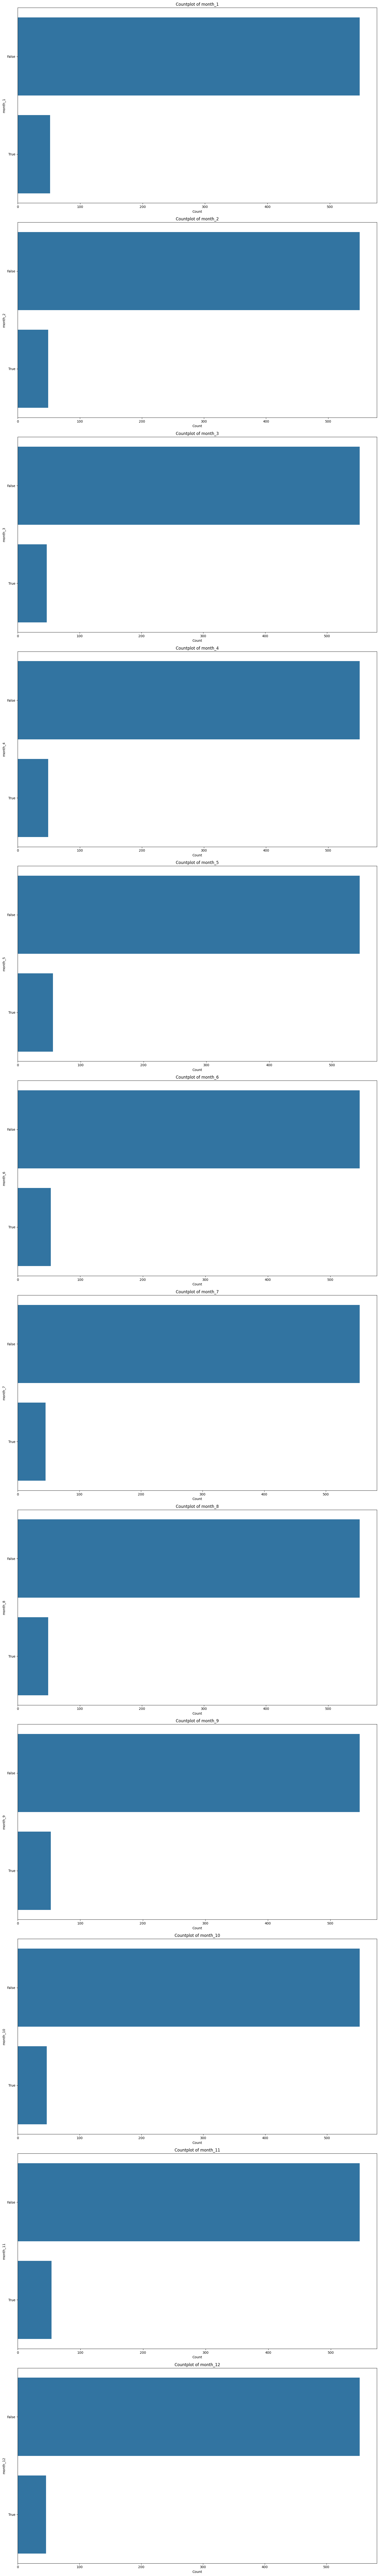

In [30]:
explorer.figures["categorical_plots"]

In [31]:
explorer.scatter_analysis()

2024-02-04 20:48:53,288 [data_explorer] [INFO] - Loaded processed data available: BikeRentalDaily_train
Scatter Plots: 100%|██████████| 16/16 [00:00<00:00, 147492.01it/s]


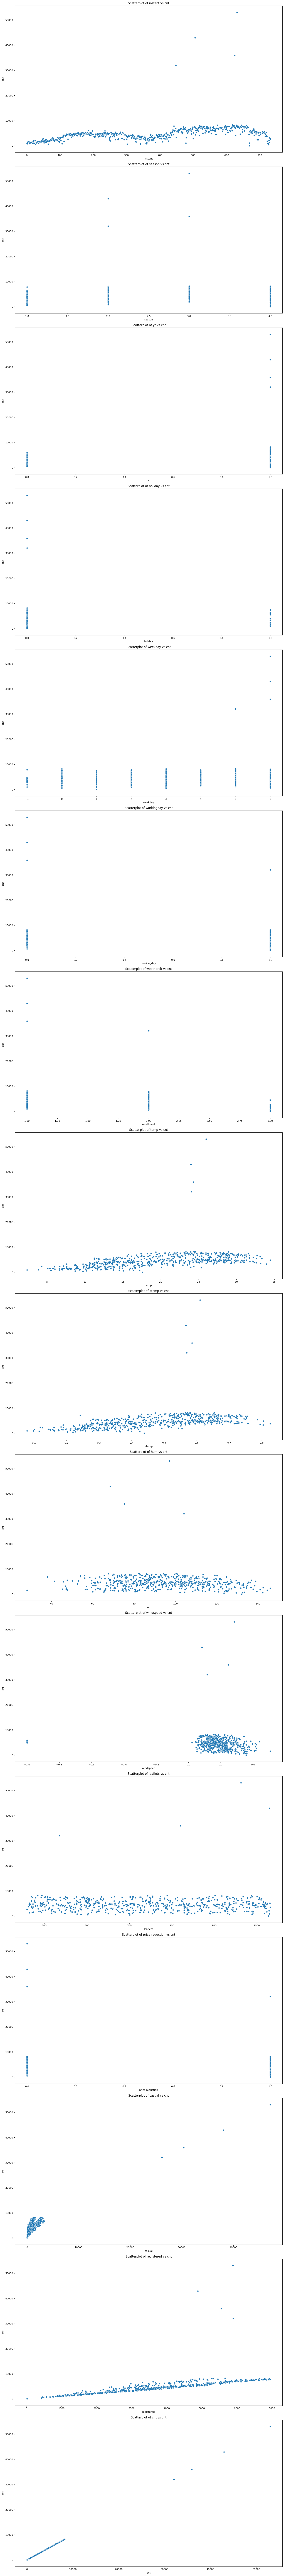

In [32]:
explorer.figures["scatter_plots"]